# Brexit Twitter Analysis

### By-
### Thejas Raju
### Sumanth Sajjan

Importing packages required

In [3]:
#For creating Twitter API
import tweepy

import pandas as pd
import numpy as np
import csv
from textblob import TextBlob

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Establishing connection to Twitter API to mine data

In [4]:
consumer_key = ""
consumer_key_secret = ""
access_token = ""
access_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


Mining tweets with search term, language and number of tweets specified

In [3]:
i=0
tweets=[];
for i in range(0,5):
    tweets = tweets + api.search("Brexit", "en", count=500)

The tweets are returned in an array with the contents contained in a json format. This can be observed below:

In [4]:
print(tweets)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
csvFile = open('tweets.csv', 'w')

#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Text'])
for tweet in tweets:
     csvWriter.writerow([tweet.text.encode('utf-8')])

csvFile.close()

Creating a pandas dataframe to store tweets in an organized structure:

In [6]:
tweets_data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(tweets_data.head(5))

,Tweets
0,RT @NadineDorries: Minister claims 80% of publ...
1,RT @michael1crowley: I joined the LP when I wa...
2,@DominicRaab I hope you win. Very charismatic ...
3,RT @bbradleymp: A #brexit thread 👇\n\n1. In 20...
4,"RT @grahamlithgow: ""What if a no deal Brexit c..."


The methods present in the 'tweets' object are:

In [7]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


Filtering from 'tweets' methods resulting in dataset required for analysis

In [8]:
len(tweets_data)

378

Creating csv file with sentiment of tweets

In [9]:
csvFile = open('Sentiment of Tweets.csv', 'w')
#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(['Text', 'Sentiment'])

i=0
for tweet in tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
        csvWriter.writerow([tweet.text.encode('utf-8'), "Positive"])
    elif analysis.sentiment[0]<0:
        csvWriter.writerow([tweet.text.encode('utf-8'), "Negative"])
    else:
        csvWriter.writerow([tweet.text.encode('utf-8'), "Neutral"])

csvFile.close()

In [9]:
import re, string, unicodedata
import nltk

from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def lemmatize(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    #words = remove_stopwords(words)
    return words
   


In [10]:
tweets_data['len']  = np.array([len(tweet.text) for tweet in tweets])
tweets_data['ID']   = np.array([tweet.id for tweet in tweets])
tweets_data['Date'] = np.array([tweet.created_at for tweet in tweets])
tweets_data['Source'] = np.array([tweet.source for tweet in tweets])
tweets_data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
tweets_data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
tweets_data['Language']    = np.array([tweet.lang for tweet in tweets])
tweets_data['Cleaned Tweet']= ([lemmatize(normalize(nltk.word_tokenize(tweet.text))) for tweet in tweets])
tweets_data['Sentiment of Cleaned']= ([TextBlob(str(tweet)).sentiment[0] for tweet in list(tweets_data['Cleaned Tweet'])])

In [11]:
i=0;
tweets_data['Sentiment']="";
for tweet in tweets_data['Cleaned Tweet']:
    j = TextBlob(str(tweet)).sentiment[0]
    if(j > 0):
        tweets_data['Sentiment'][i]='Positive'
        i=i+1
    elif(j < 0):
        tweets_data['Sentiment'][i]='Negative'
        i=i+1
    else:
        tweets_data['Sentiment'][i]='Neutral'
        i=i+1

F:\Text Analytics\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
F:\Text Analytics\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Text Analytics\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
tweets_data.tail(5)

,Tweets,len,ID,Date,Source,Likes,RTs,Language,Cleaned Tweet,Sentiment of Cleaned,Sentiment
495,"RT @TheEconomist: Without a deal, Britons’ rig...",122,1100409209504419840,2019-02-26 14:56:14,Twitter Web Client,0,22,en,"[rt, theeconomist, without, a, deal, briton, r...",0.342857,Positive
496,RT @NPR: Just In: Prime Minister Theresa May h...,140,1100409209315745797,2019-02-26 14:56:14,Twitter Web Client,0,159,en,"[rt, npr, just, in, prime, minister, theresa, ...",0.250000,Positive
497,"RT @BBCPolitics: ""I will not sit and listen to...",140,1100409209290612739,2019-02-26 14:56:14,Twitter for Android,0,209,en,"[rt, bbcpolitics, i, will, not, sit, and, list...",0.136364,Positive
498,RT @andyfarnell07: We can't afford a #nodealbr...,140,1100409209030492160,2019-02-26 14:56:14,Twitter for iPad,0,1,en,"[rt, andyfarnell07, we, ca, nt, afford, a, nod...",0.000000,Neutral
499,RT @chelleryn99: For those of you slagging me ...,140,1100409205666660352,2019-02-26 14:56:13,Twitter for Android,0,119,en,"[rt, chelleryn99, for, those, of, you, slaggin...",0.000000,Neutral


In [14]:
round(tweets_data['len'].describe(),2)

count    500.00
mean     132.17
std       18.18
min       36.00
25%      139.00
50%      140.00
75%      140.00
max      144.00
Name: len, dtype: float64

In [15]:
count=0;
i=0;
sources=tweets_data.Source.unique()
perc=[]
pos=[]
print("Sources are: ",tweets_data.Source.unique())
for source in sources:
    count=0;
    for tweet in tweets:
        if(tweet.source==source):
            count=count+1;
    print("\nNumber of tweets from ",source,":",count)
    print("Percentage of tweets from ",source,":", ((count/len(tweets))*100))
    perc.append(round((count/len(tweets))*100,2))

print(perc)

percentage_list = pd.DataFrame(
    {'Source': sources,
     'Share': perc,
    })

print(percentage_list.sort_values('Share',ascending=False));

Sources are:  ['Twitter for iPhone' 'Twitter for iPad' 'Twitter Web Client'
 'Twitter for Android' 'Twitter Web App' 'SocialFlow' 'IFTTT'
 'Latest Commentary' 'WordPress.com' 'TCR Party' 'Tweetbot for iΟS'
 'TweetDeck']

Number of tweets from  Twitter for iPhone : 145
Percentage of tweets from  Twitter for iPhone : 28.999999999999996

Number of tweets from  Twitter for iPad : 49
Percentage of tweets from  Twitter for iPad : 9.8

Number of tweets from  Twitter Web Client : 101
Percentage of tweets from  Twitter Web Client : 20.200000000000003

Number of tweets from  Twitter for Android : 128
Percentage of tweets from  Twitter for Android : 25.6

Number of tweets from  Twitter Web App : 42
Percentage of tweets from  Twitter Web App : 8.4

Number of tweets from  SocialFlow : 5
Percentage of tweets from  SocialFlow : 1.0

Number of tweets from  IFTTT : 7
Percentage of tweets from  IFTTT : 1.4000000000000001

Number of tweets from  Latest Commentary : 5
Percentage of tweets from  Latest Com

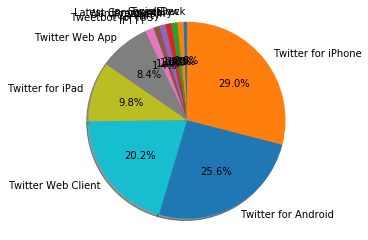

In [16]:
#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

import matplotlib.pyplot as plt

percentage_list=percentage_list.sort_values('Share',ascending=True)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = np.array(percentage_list['Source'])
sizes = np.array(percentage_list['Share'])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

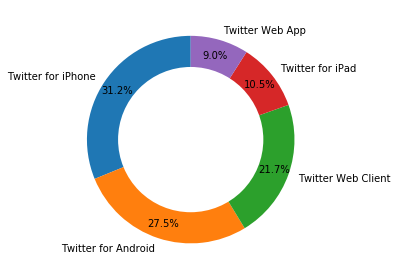

In [17]:
percentage_list=percentage_list.sort_values('Share',ascending=False)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = np.array(percentage_list['Source'][0:5])
sizes = np.array(percentage_list['Share'][0:5])
 
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [206]:
print(percentage_list['Source'])

0     Twitter for iPhone
3    Twitter for Android
1     Twitter Web Client
5       Twitter for iPad
2        Twitter Web App
7       Tweetbot for iΟS
8             SocialFlow
4         Hootsuite Inc.
6              TweetDeck
9          WordPress.com
Name: Source, dtype: object


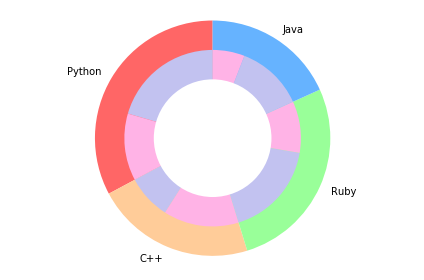

In [18]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [504, 337, 415, 280]
labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
sizes_gender = [315,189,125,212,270,145,190,90]
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()